In [1]:
from pynq import Overlay
from time import sleep
import numpy as np
from matplotlib import pyplot as plt
from os import path
import pandas as pd
from datetime import datetime, timedelta
from pytz import timezone

from TestChip import TestChip

%matplotlib inline

# Experiment 1 

Collect grid data of RO frequency.

# Experiment 2
Collect randomply placed RO frequency data on 128 ROs for various resolutions.

In [15]:
def record(ol, total_duration, every):
    """
    parameters
    ----------
    total_duration : total duration in seconds
    every : sampling step size in seconds
    """
    data = []   # [RO#_0, ..., RO#_{num_oscillators}]
    RO_dict = dict(RO0=list(range(32)), RO1=list(range(32)), RO2=list(range(32)), RO3=list(range(32)))
    #BTI_dict = dict(BTI0=list(range(3)))
    times = []
    init_time = datetime.now()
    now_time = init_time
    while(now_time < (init_time + total_duration)):
        now_time = datetime.now()
        temp = ol.XADC_temp()
        print(temp)
        vccint = ol.XADC_voltage('vccint')
        vccaux = ol.XADC_voltage('vccaux')
        vbram = ol.XADC_voltage('vbram')
        output_RO_dict = ol.read_RO(RO_dict)
        #output_BTI_dict = ol.read_BTI(BTI_dict)
        current_read = np.hstack((output_RO_dict['RO0'], output_RO_dict['RO1'])) #
        current_read = np.hstack((current_read, output_RO_dict['RO2']))
        current_read = np.hstack((current_read, output_RO_dict['RO3']))
        current_read = np.hstack((current_read, np.array([vccint, vccaux ,vbram, temp])))
        times.append(now_time)
        data.append(current_read)
        while(datetime.now() < now_time + every):
            pass
    data = np.vstack(data)
    output = pd.DataFrame(data, columns=(
        [f'RO0_{i}' for i in range(len(output_RO_dict['RO0']))] + [f'RO1_{i}' for i in range(len(output_RO_dict['RO1']))] +
        [f'RO2_{i}' for i in range(len(output_RO_dict['RO2']))] + [f'RO3_{i}' for i in range(len(output_RO_dict['RO3']))]
        + ['vccint', 'vccaux', 'vbram','Temperature']))
    output['Timestamp'] = pd.DataFrame(dict(Timestamp=times))
    return output

In [28]:
every = timedelta(seconds = 5)
total_duration = timedelta(seconds = 40)

for resolution in [0, 1, 2, 5, 10 , 20, 50, 140]:
    for num in range(5):
        ol = TestChip(f'/home/xilinx/pynq/overlays/RO/RO_resolution_{resolution}_num_{num}.bit')
        output = record(ol, total_duration, every)
        output.to_pickle(f'RO_resolution_{resolution}_num_{num}.pkl')

52.90804443359377
53.27716674804691
53.646289062500045
53.769329833984386
53.52324829101565
54.13845214843752
54.26149291992192
54.01541137695318
54.01541137695318
53.40020751953131
52.90804443359377
52.415881347656295
52.90804443359377
52.78500366210943
52.415881347656295
52.538922119140636
52.2928405761719
52.2928405761719
52.538922119140636
52.16979980468756
52.661962890625034
52.415881347656295
52.78500366210943
53.15412597656251
52.415881347656295
53.03108520507817
52.90804443359377
52.661962890625034
53.03108520507817
52.78500366210943
52.90804443359377
52.538922119140636
53.03108520507817
52.90804443359377
52.661962890625034
53.40020751953131
53.40020751953131
53.03108520507817
53.03108520507817
53.769329833984386
53.40020751953131
53.03108520507817
53.646289062500045
53.769329833984386
53.646289062500045
53.15412597656251
52.661962890625034
53.03108520507817
52.04675903320316
52.661962890625034
52.04675903320316
52.90804443359377
52.2928405761719
51.67763671875002
52.9080444335

(array([ 1.,  2.,  0.,  1.,  4., 10.,  9., 15., 64., 22.]),
 array([390.089 , 397.1927, 404.2964, 411.4001, 418.5038, 425.6075,
        432.7112, 439.8149, 446.9186, 454.0223, 461.126 ]),
 <a list of 10 Patch objects>)

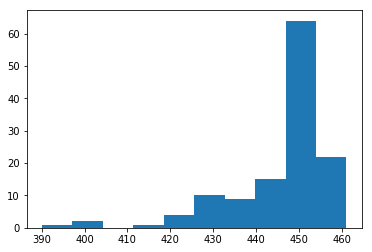

In [69]:

output = pd.read_pickle('RO_resolution_0_num_4.pkl')
plt.hist(output[[f'RO0_{i}' for i in range(32)] + [f'RO1_{i}' for i in range(32)] +
        [f'RO2_{i}' for i in range(32)] + [f'RO3_{i}' for i in range(32)]].iloc[0].tolist())


In [8]:
BTI_dict = dict(BTI0=list(range(3)))
output_BTI_dict = ol.read_BTI(BTI_dict)

freq: 476.108, mem: 4, sensor: 0
freq: 543.479, mem: 8, sensor: 1
freq: 535.666, mem: 12, sensor: 2


In [9]:
ol.read_BTI(dict(BTI0=list(range(3))))

freq: 476.589, mem: 4, sensor: 0
freq: 543.388, mem: 8, sensor: 1
freq: 535.465, mem: 12, sensor: 2


{'BTI0': array([476.589, 543.388, 535.465])}

In [23]:
%%timeit
getattr(ol, 'RO0')

100 loops, best of 3: 17.1 ms per loop
